In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline 

In [2]:
Data_train=pd.read_csv('./titanic/train.csv')

In [3]:
Data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
Data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
Data_train=Data_train.drop(['Cabin'],axis=1)

In [7]:
Data_train['Age'].fillna(value=Data_train['Age'].mean(), inplace=True)

In [8]:
Data_train=Data_train.dropna()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Data_train, Data_train, test_size=0.3)

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 622 entries, 683 to 441
Data columns (total 11 columns):
PassengerId    622 non-null int64
Survived       622 non-null int64
Pclass         622 non-null int64
Name           622 non-null object
Sex            622 non-null object
Age            622 non-null float64
SibSp          622 non-null int64
Parch          622 non-null int64
Ticket         622 non-null object
Fare           622 non-null float64
Embarked       622 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 58.3+ KB


## 找出重要feature

In [11]:
print(X_train.corrwith(X_train['Survived']))
#較相關的數值欄位有Fare  
selectedFeature=['Fare']

PassengerId    0.008601
Survived       1.000000
Pclass        -0.315539
Age           -0.126165
SibSp         -0.027801
Parch          0.107920
Fare           0.231985
dtype: float64


In [12]:
classLabel=[]
for i in range(len(X_train.columns)):
    if(X_train[X_train.columns[i]].dtypes==object):
        classLabel.append(X_train.columns[i])
classLabel

['Name', 'Sex', 'Ticket', 'Embarked']

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

結論:Pclass 3存活率很低


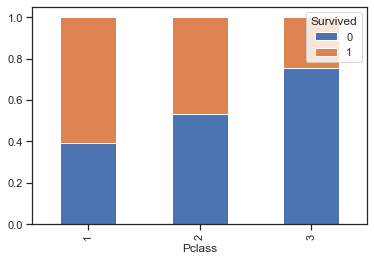

In [14]:
#畫出Pclass對Survived的影響
props = X_train.groupby("Pclass")['Survived'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True')
print("結論:Pclass 3存活率很低")

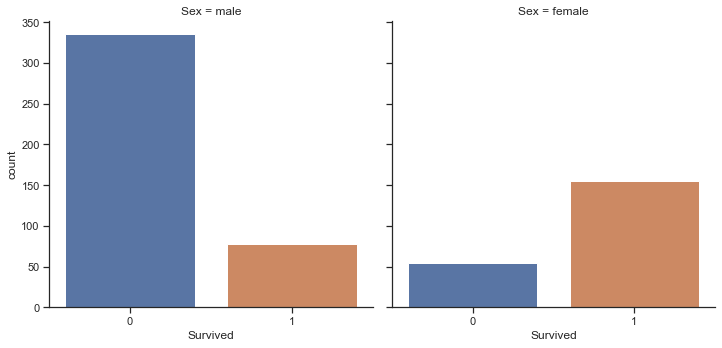

In [15]:
#畫出sex對Survived的影響
sns.catplot("Survived", col="Sex",data=X_train,kind="count")

結論:男生存活率低(20%);女生存活率高(70%)


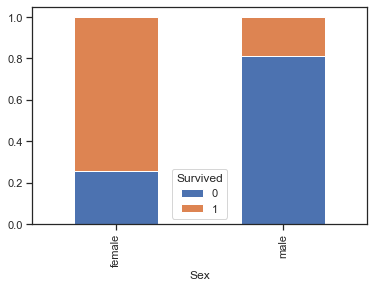

In [16]:
props = X_train.groupby("Sex")['Survived'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True')
print("結論:男生存活率低(20%);女生存活率高(70%)")

結論:Embarked in S很多;Embarked in Q最少


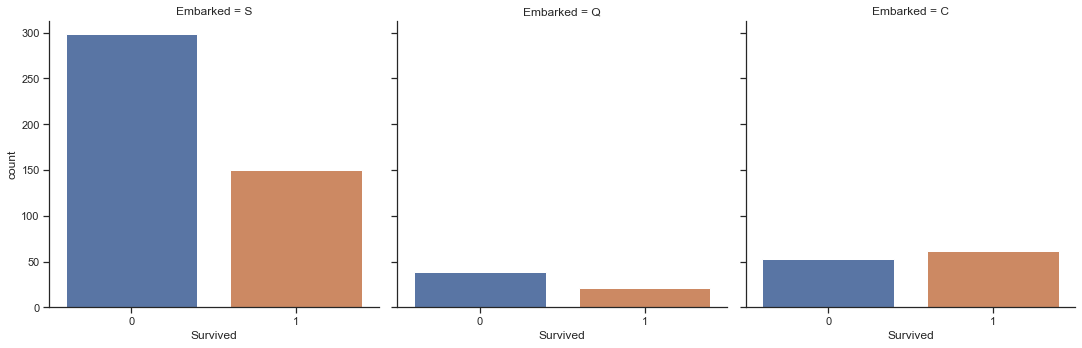

In [17]:
#畫出Embarked對Survived的影響
sns.catplot("Survived", col="Embarked",data=X_train,kind="count")
print("結論:Embarked in S很多;Embarked in Q最少")

結論:Embarked in C存活率大於50%;其他存活率小於50%


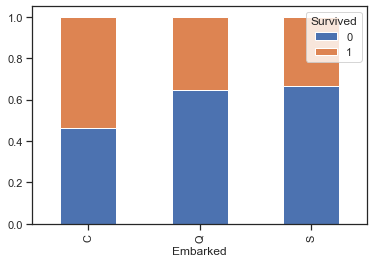

In [18]:
print("結論:Embarked in C存活率大於50%;其他存活率小於50%")
props = X_train.groupby("Embarked")['Survived'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True')

結論:女生的存活率很高;其中男生且Embarked為Q的存活率為0


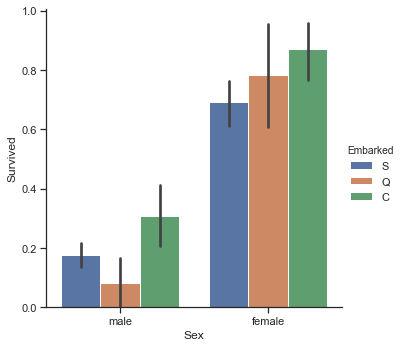

In [19]:
#Embarked和Sex的存活率
print("結論:女生的存活率很高;其中男生且Embarked為Q的存活率為0")
sns.catplot(x="Sex", y="Survived", hue="Embarked", kind="bar", data=X_train);

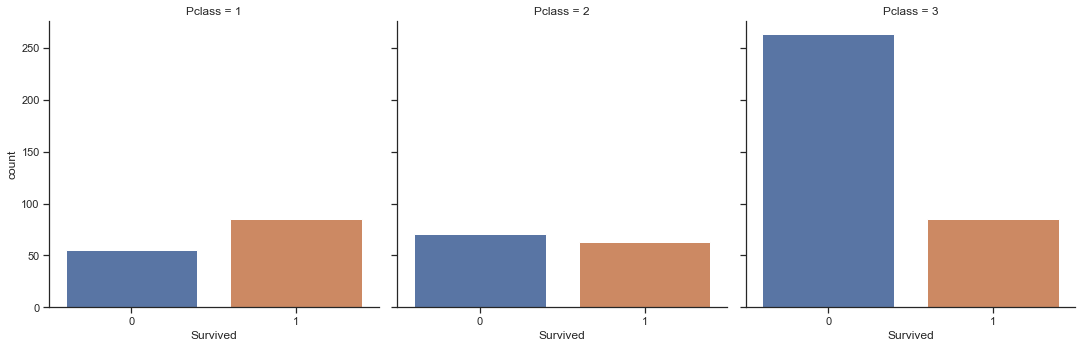

In [20]:
sns.catplot("Survived", col="Pclass",data=X_train,kind="count")

In [21]:
selectedFeature.append('Pclass')
selectedFeature.append('Sex')
selectedFeature.append('Embarked')
selectedFeature

['Fare', 'Pclass', 'Sex', 'Embarked']

In [160]:
## 從training data中選擇好了重要的Features, 接著寫出標準資料前處理的流程
def preProcess(Data):
    Data=Data[['Survived','Fare','Pclass','Sex','Embarked']]
    Data=Data.dropna()
    Y=Data['Survived']
    temp=Data['Fare']
    Data['Sex']=class_le.fit_transform(Data['Sex'].values)
    Temp_OneHotEncode=pd.get_dummies(Data[['Pclass', 'Embarked']].astype(str))
    X=pd.concat([Data[['Fare','Sex']],Temp_OneHotEncode],axis=1)
    return X,Y
def TestpreProcess(Data):
    Data=Data[['Fare','Pclass','Sex','Embarked']]
    Data=Data.dropna()
    temp=Data['Fare']
    Data['Sex']=class_le.fit_transform(Data['Sex'].values)
    Temp_OneHotEncode=pd.get_dummies(Data[['Pclass', 'Embarked']].astype(str))
    X=pd.concat([Data[['Fare','Sex']],Temp_OneHotEncode],axis=1)
    return X

In [161]:
Data_train=pd.read_csv('./titanic/train.csv')
X_train, X_test, y_train, y_test = train_test_split(Data_train, Data_train, test_size=0.3)
#X_train,y_train=preProcess(Data_train)

In [162]:
X_train_process,y_train_process=preProcess(X_train)
X_test_process,y_test_process=preProcess(X_test)

## 處理選出的Feature

In [163]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [164]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train_process, y_train_process)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [165]:
ypred = model.predict(X_test_process)

In [167]:
print('準確率:',model.score(X_test_process,y_test_process))

準確率: 0.8246268656716418


In [168]:
#整個data在tain一次
X_AllTrain_process,y_AllTrain_process=preProcess(Data_train)

In [170]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_AllTrain_process, y_AllTrain_process)
ypred = model.predict(X_test_process)
print('準確率:',model.score(X_test_process,y_test_process))

準確率: 0.9067164179104478


## 測試資料

In [171]:
Data_test=pd.read_csv('./titanic/test.csv')
Data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [173]:
Data_test['Fare'].fillna(value=Data_test['Fare'].mean(), inplace=True)

In [174]:
X_test=TestpreProcess(Data_test)

In [175]:
ypred = model.predict(X_test)

In [178]:
ypred

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [179]:
df1=Data_test['PassengerId'].copy()
df1.reset_index(drop=True, inplace=True)
df2=pd.DataFrame(ypred)
df2.reset_index(drop=True, inplace=True)
df = pd.concat( [df1, df2], axis=1) 
df.columns=['PassengerId','Survived']
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [180]:
df.to_csv('Result3.csv',index=False)

### 最後準確率為:0.78468

Your Best Entry !!!<br>
You advanced 9,194 places on the leaderboard!<br>
Your submission scored 0.78468, which is an improvement of your previous score of 0.76076. Great job!<br>